In [32]:
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

In [33]:
# Monta dataframe com nome dos arquivos
fn1 = os.listdir("D:/DropB/Faculeste/TCC/Imagens/COVID-19_Radiography_Dataset/COVID/images")
fn2 = os.listdir("D:/DropB/Faculeste/TCC/Imagens/COVID-19_Radiography_Dataset/Normal/images")

ct1 = []
for fn in fn1:
  ct1.append([0])

df1 = pd.DataFrame({
  'arquivo': fn1,
  'categoria': ct1
})
#df1

ct2 = []
for fn in fn2:
  ct2.append([1])

df2 = pd.DataFrame({
  'arquivo': fn2,
  'categoria': ct2
})
df = df1.append(df2)

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_10552\3751071403.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


In [34]:
# gerando dataframes de treinamento e de teste
dfTreinamento = df.sample(frac=0.8, random_state=100)
dfTeste = df[~df.index.isin(dfTreinamento.index)]

In [35]:
width = 32
height = 32
depth = 3
classes = 2
inputShape = (height, width, depth)

In [36]:
imgGen = ImageDataGenerator(rescale = 1./255, 
                            shear_range=0.25, 
                            zoom_range = 0.25, 
                            horizontal_flip = True)

conjTreinamento = imgGen.flow_from_dataframe(dfTreinamento, "D:/DropB/Faculeste/TCC/Imagens/dataFrame", 
                                  x_col = 'arquivo',
                                  y_col = 'categoria',
                                  target_size=(width, height), 
                                  batch_size=32, 
                                  class_mode='categorical')

conjTeste = imgGen.flow_from_dataframe(dfTeste, "D:/DropB/Faculeste/TCC/Imagens/dataFrame", 
                                  x_col = 'arquivo',
                                  y_col = 'categoria',
                                  target_size=(width, height), 
                                  batch_size=32, 
                                  class_mode='categorical')


Found 11046 validated image filenames belonging to 2 classes.
Found 1590 validated image filenames belonging to 2 classes.


In [23]:
# ShallowNet - Ajustar imagens para 32 x 32
from shallowNet import ShallowNet
shlwClf = ShallowNet()
shlwClf = shlwClf.build(width=32, height=32, depth=3, classes=2)
shlwClf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 2)                 65538     
                                                                 
 activation_1 (Activation)   (None, 2)                 0         
                                                                 
Total params: 66,434
Trainable params: 66,434
Non-trainable params: 0
_________________________________________________________________


c:\Users\Marcelo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [24]:
# Lenet5 - Ajustar imagens para 32 x 32
from leNet5M import LeNet5M
ln5Clf = LeNet5M()
ln5clfM = ln5Clf.build(h=32, w=32, prof=3, cl=2)
ln5clfM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 6)         906       
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 6)          0         
 ePooling2D)                                                     
                                                                 
 dense_1 (Dense)             (None, 5, 5, 120)         840       
                                                                 
 flatten_1 (Flatten)         (None, 3000)             

In [25]:
# AlexNet - Ajustar imagens para 32 x 32
from alexNet import AlexNet
alxClf = AlexNet()
alxClf = alxClf.build(width=32, height=32, depth=3, classes=2)
alxClf.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 8, 8, 96)          34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 256)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 384)         885120    
                                                                 
 conv2d_6 (Conv2D)           (None, 2, 2, 384)        

In [26]:
# VGG16 - Ajustar imagens para 32 x 32
from vgg16M import Vgg16M
vggClf = Vgg16M()
vggClf = vggClf.build(width=32, height=32, depth=3, classes=2)
vggClf.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 activation_2 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 activation_3 (Activation)   (None, 32, 32, 64)        0         
                                                      

In [37]:
# CheXNet - Ajustar imagens para 32 x 32
from cxNet import CXNet
cxClf = CXNet()
cxClf = cxClf.build(width=32, height=32, depth=3, classes=2)
cxClf.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d_6 (ZeroPadding2  (None, 38, 38, 3)   0           ['input_4[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 16, 16, 64)   9408        ['zero_padding2d_6[0][0]']       
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1/conv[0][0]']       

In [28]:
spe = 5
epc = 10
vls = 100
print("Shallow Net ***************************************************")
h1 = shlwClf.fit(x=conjTreinamento, steps_per_epoch=spe, epochs=epc, validation_data=conjTeste, validation_steps=vls, verbose=1).history 

print("LeNet 5 *******************************************************")
h2 = ln5clfM.fit(x=conjTreinamento, steps_per_epoch=spe, epochs=epc, validation_data=conjTeste, validation_steps=vls, verbose=1).history

print("AlexNet *******************************************************")
h3 = alxClf.fit(x=conjTreinamento, steps_per_epoch=spe, epochs=epc, validation_data=conjTeste, validation_steps=vls, verbose=1).history

print("Vgg16 *********************************************************")
h4 = vggClf.fit(x=conjTreinamento, steps_per_epoch=spe, epochs=epc, validation_data=conjTeste, validation_steps=vls, verbose=1).history 

print("cxNet *********************************************************")
h5 = cxClf.fit(x=conjTreinamento, steps_per_epoch=spe, epochs=epc, validation_data=conjTeste, validation_steps=vls, verbose=1).history

Shallow Net ***************************************************
Epoch 1/10
5/5 [==============================] - 35s 9s/step - loss: 1.4705 - accuracy: 0.6875 - val_loss: 0.3118 - val_accuracy: 0.9113
Epoch 2/10
5/5 [==============================] - 5s 1s/step - loss: 0.5733 - accuracy: 0.8375
Epoch 3/10
5/5 [==============================] - 5s 930ms/step - loss: 0.6176 - accuracy: 0.7375
Epoch 4/10
5/5 [==============================] - 5s 1s/step - loss: 0.5951 - accuracy: 0.7250
Epoch 5/10
5/5 [==============================] - 5s 1s/step - loss: 0.5528 - accuracy: 0.7500
Epoch 6/10
5/5 [==============================] - 5s 967ms/step - loss: 0.7015 - accuracy: 0.6750
Epoch 7/10
5/5 [==============================] - 5s 922ms/step - loss: 0.5870 - accuracy: 0.7125
Epoch 8/10
5/5 [==============================] - 4s 733ms/step - loss: 0.6161 - accuracy: 0.6716
Epoch 9/10
5/5 [==============================] - 5s 940ms/step - loss: 0.6020 - accuracy: 0.7063
Epoch 10/10
5/5 [======

In [43]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

spe = 5
epc = 10
vls = 100
rlr = ReduceLROnPlateau(monitor = 'accuracy', factor = 0.2, patience = 2, verbose = 1, 
                                min_delta = 1e-4, min_lr = 1e-4, mode = 'max')
es = EarlyStopping(monitor = 'accuracy', min_delta = 1e-4, patience = 5, mode = 'max', 
                    restore_best_weights = True, verbose = 1)

ckp = ModelCheckpoint('model.h5',monitor = 'accuracy',
                      verbose = 0, save_best_only = True, mode = 'max')

#history = model.fit(
#      train_generator,
#      epochs=20,
#      validation_data=valid_generator,
#      callbacks=[es,rlr, ckp],
#      verbose=1)
#Epoch 1/20
print("cxNet *********************************************************")
h5 = cxClf.fit(x=conjTreinamento, steps_per_epoch=spe, epochs=epc, validation_data=conjTeste, callbacks = [es, rlr, ckp], validation_steps=vls, verbose=1).history
h5

cxNet *********************************************************
Epoch 1/10
5/5 [==============================] - 9s 2s/step - loss: 0.4170 - val_loss: 0.6494 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 4s 712ms/step - loss: 0.3979 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 3s 580ms/step - loss: 0.4121 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 3s 566ms/step - loss: 0.4687 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - 3s 541ms/step - loss: 0.3842 - lr: 0.0010
Epoch 6/10
5/5 [==============================] - 3s 641ms/step - loss: 0.4394 - lr: 0.0010
Epoch 7/10
5/5 [==============================] - 3s 574ms/step - loss: 0.4441 - lr: 0.0010
Epoch 8/10
5/5 [==============================] - 3s 594ms/step - loss: 0.4340 - lr: 0.0010
Epoch 9/10
5/5 [==============================] - 3s 541ms/step - loss: 0.3341 - lr: 0.0010
Epoch 10/10
5/5 [==============================] - 3s 490ms/step - loss: 0.3422 - lr: 0.0010

{'loss': [0.4170348048210144,
  0.3978901207447052,
  0.41207513213157654,
  0.46869367361068726,
  0.384152352809906,
  0.43936339020729065,
  0.44405117630958557,
  0.43404659628868103,
  0.33406496047973633,
  0.34217602014541626],
 'val_loss': [0.6494277119636536],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]}

KeyError: 'accuracy'

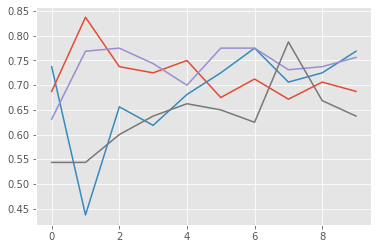

In [30]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,10), h1["accuracy"], label="Shallow Net")
plt.plot(np.arange(0,10), h2["accuracy"], label="LeNet 5")
plt.plot(np.arange(0,10), h3["accuracy"], label="AlexNet")
plt.plot(np.arange(0,10), h4["accuracy"], label="VGG 16")
plt.plot(np.arange(0,10), h5["accuracy"], label="CheXNet")
plt.title("Acurácia no Treinamento - Covid-19")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
